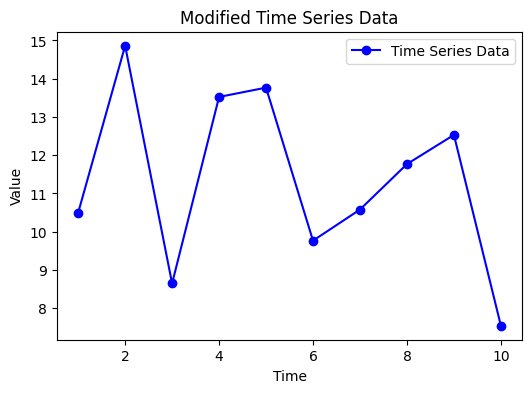

ADF Statistic: -2.996643055609332
p-value: 0.03520908812926828
Critical Values:
   1%: -4.6651863281249994
   5%: -3.3671868750000002
   10%: -2.802960625
The data is stationary (reject the null hypothesis).


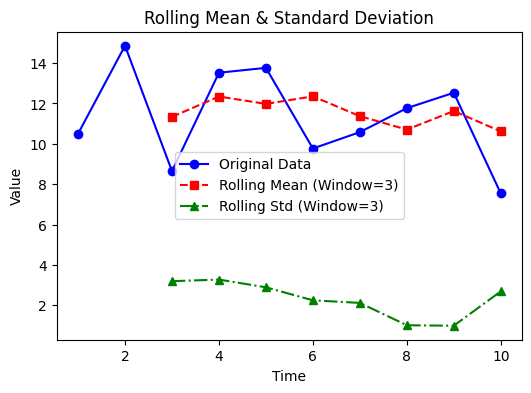

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Generate synthetic time series data with random noise
np.random.seed(42)
time = np.arange(1, 11)
values = np.array([10, 15, 8, 12, 14, 10, 9, 11, 13, 7]) + np.random.normal(0, 1, len(time))

# Create DataFrame
df = pd.DataFrame({'Time': time, 'Value': values})

# Plot the time series data
plt.figure(figsize=(6,4))
plt.plot(df['Time'], df['Value'], marker='o', linestyle='-', color='b', label="Time Series Data")
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Modified Time Series Data')
plt.legend()
plt.show()

# Perform Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] <= 0.05:
        print("The data is stationary (reject the null hypothesis).")
    else:
        print("The data is non-stationary (fail to reject the null hypothesis).")

# Apply ADF test
adf_test(df['Value'])

# Calculate rolling mean and standard deviation
df['Rolling_Mean'] = df['Value'].rolling(window=3).mean()
df['Rolling_Std'] = df['Value'].rolling(window=3).std()

# Plot rolling statistics
plt.figure(figsize=(6,4))
plt.plot(df['Time'], df['Value'], marker='o', linestyle='-', color='b', label="Original Data")
plt.plot(df['Time'], df['Rolling_Mean'], marker='s', linestyle='--', color='r', label="Rolling Mean (Window=3)")
plt.plot(df['Time'], df['Rolling_Std'], marker='^', linestyle='-.', color='g', label="Rolling Std (Window=3)")
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Rolling Mean & Standard Deviation')
plt.legend()
plt.show()
